### LINEAR DISCRIMINANT ANALYSIS 

**importing liberaries**

In [60]:
import pandas as pd 
import numpy as np 
import math 
import sympy
import seaborn as sns 
import matplotlib.pyplot as plt

**given dataset**

In [61]:
class_1 = [(4,2),(2,4),(2,3),(3,6),(4,4)]
c1 = pd.DataFrame(class_1)

class_2 = [(9,10),(6,8),(9,5),(8,7),(10,8)]
c2 = pd.DataFrame(class_2)


**visualisation**

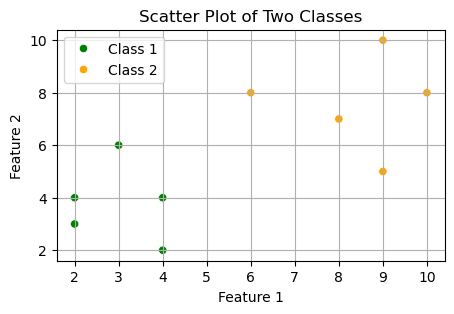

In [62]:
c1['class'] = 'Class 1'
c2['class'] = 'Class 2'

df = pd.concat([c1, c2])
plt.figure(figsize=(5,3))

# Create the scatter plot using Seaborn
sns.scatterplot(x=0, y=1, hue='class', data=df, palette={'Class 1': 'green', 'Class 2': 'orange'})

# Add labels and title
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter Plot of Two Classes')

# Show the legend
plt.legend()

# Display the plot
plt.grid(True)
plt.show()

**mean of both data**

In [63]:
c1_xmean = c1[0].mean()
c1_ymean = c1[1].mean()

c2_xmean = c2[0].mean()
c2_ymean = c2[1].mean()

print(f"x mean of class 1 : {c1_xmean}")
print(f"y mean of class 1 : {c1_ymean}")
print(f"x mean of class 1 : {c2_xmean}")
print(f"y mean of class 1 : {c2_ymean}")

x mean of class 1 : 3.0
y mean of class 1 : 3.8
x mean of class 1 : 8.4
y mean of class 1 : 7.6


**compute scatter matrix within the class for class 1 (sw1)**

In [64]:
c1['x-xm'] = c1[0] - c1_xmean
c1['y-ym'] = c1[1] - c1_ymean



sw1 = np.zeros((2, 2))  # Initialize a 2x2 matrix with zeros

for i in range(len(c1)):
    row = np.array([c1.loc[i, 'x-xm'], c1.loc[i, 'y-ym']]).reshape(2, 1)
    sw1 += row.dot(row.T) 

print(sw1)    

[[ 4.  -1. ]
 [-1.   8.8]]


**compute scatter matrix within the class for class 2 (sw2)**

In [65]:
# Initialize a 2x2 matrix with zeros
sw2 = np.zeros((2, 2))

for i in range(len(c2)):
    row = np.array([c2.iloc[i, 0] - c2_xmean , c2.iloc[i, 1] - c2_ymean]).reshape(2, 1)
    sw2 += row.dot(row.T) 

print(sw2) 

[[ 9.2 -0.2]
 [-0.2 13.2]]


**compute sccatter matrix within class**

In [66]:
sw = sw1 + sw2
sw

array([[13.2, -1.2],
       [-1.2, 22. ]])

**compute sccatter matrix between classes**

In [67]:
diff = np.array([c1_xmean -c2_xmean , c1_ymean - c2_ymean]).reshape(2,1)

sb = diff.dot(diff.T)
sb


array([[29.16, 20.52],
       [20.52, 14.44]])

**compute eigen value and eigen vector**

In [68]:
matrix =  np.linalg.inv(sw).dot(sb) 
eigenvalues, eigenvectors = np.linalg.eig(matrix)

print("Original Matrix:\n", matrix)
print("\nEigenvalues:\n", eigenvalues[0])
print("\nEigenvectors:\n", eigenvectors[0])


Original Matrix:
 [[2.30531561 1.62225914]
 [1.05847176 0.7448505 ]]

Eigenvalues:
 3.050166112956811

Eigenvectors:
 [ 0.90878558 -0.57549341]


In [76]:
c1_new = c1[[0,1]].dot(eigenvectors[0].reshape(2,1))
c2_new = c2[[0,1]].dot(eigenvectors[0].reshape(2,1))

df = pd.concat([c1_new ,c2_new])
